Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0915
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0857 
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0761 
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0688 
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0596 
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0541 
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0444 
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0391 
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0198
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 
Epoch 16/50

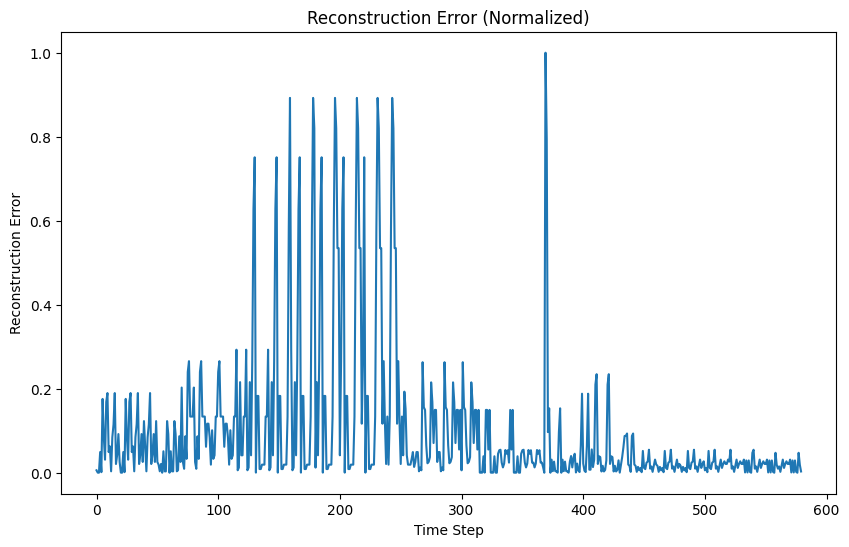

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset (stable_sections.csv)
data = pd.read_csv('stable_sections.csv')

# Step 2: Extract "closePrice" column as time series
time_series_data = data['closePrice'].values  # Assuming closePrice is in the dataset
time_series_data = time_series_data.reshape(-1, 1)  # Reshape to make it a 2D array for scaling

# Step 3: Normalize the "closePrice" data
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series_data)  # Normalize between 0 and 1

# Step 4: Build the Autoencoder Model
input_layer = Input(shape=(time_series_scaled.shape[1],))  # Input layer for time series data
encoded = Dense(64, activation='relu')(input_layer)  # Encoder layer with ReLU activation
decoded = Dense(time_series_scaled.shape[1], activation='sigmoid')(encoded)  # Decoder layer

autoencoder = Model(input_layer, decoded)  # Full model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Autoencoder
autoencoder.fit(time_series_scaled, time_series_scaled, epochs=50, batch_size=32)

# Step 6: Get the reconstructed output
time_series_reconstructed = autoencoder.predict(time_series_scaled)

# Step 7: Calculate reconstruction error (Mean Squared Error)
reconstruction_error = np.mean(np.square(time_series_scaled - time_series_reconstructed), axis=1)

# Step 8: Normalize the reconstruction error (for iFMII calculation)
reconstruction_error_scaled = (reconstruction_error - np.min(reconstruction_error)) / (np.max(reconstruction_error) - np.min(reconstruction_error))

# Step 9: Calculate iFMII (Mean of the scaled reconstruction error)
iFMII = np.mean(reconstruction_error_scaled)

# Display iFMII value
print(f"iFMII: {iFMII}")

# Optionally, visualize the reconstruction error
plt.figure(figsize=(10, 6))
plt.plot(reconstruction_error_scaled)
plt.title('Reconstruction Error (Normalized)')
plt.xlabel('Time Step')
plt.ylabel('Reconstruction Error')
plt.show()